In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data importation

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the file with automatic separator detection
data = pd.read_csv('data.txt', delim_whitespace=True)

# Extract target (y) and predictors (X)
Y = data['y']
X = data.drop(columns=['y'])

C:\Users\polol\AppData\Local\Temp\ipykernel_2540\2406083602.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('data.txt', delim_whitespace=True)


### Definition of the RMSE function and calculation of the baseline RMSE value (RMSE for a constant prediction of y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Reference value of RMSE: RMSE for a constant prediction
print("RMSE baseline = ",Y.std())

RMSE baseline =  8.53123766184774


## Useful function definition

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Modified stratified_cross_val_rmse to handle transformations like adding quadratic terms
def stratified_cross_val_rmse(
    model, X, Y, n_bins=5, n_splits=5, random_state=42, transform_func=None
):
    """
    Perform stratified k-fold cross-validation with RMSE calculation and optional transformation.

    Parameters:
    - model: The machine learning model to evaluate.
    - X: The predictors (DataFrame or NumPy array).
    - Y: The target variable (Pandas Series or NumPy array).
    - n_bins: Number of bins to create for stratification of Y.
    - n_splits: Number of folds for cross-validation.
    - random_state: Random state for reproducibility.
    - transform_func: Function to transform training and testing sets (e.g., adding quadratic terms).

    Returns:
    - rmse_scores: List of RMSE scores for each fold.
    - avg_rmse: Average RMSE across all folds.
    """
    y_binned = pd.qcut(Y, q=n_bins, labels=False)  # Quantile-based discretization
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_index, test_index in skf.split(X, y_binned):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Apply transformation if specified
        if transform_func:
            X_train = transform_func(X_train)
            X_test = transform_func(X_test)

        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(Y_test, predictions))
        rmse_scores.append(rmse)

    avg_rmse = np.mean(rmse_scores)
    return rmse_scores, avg_rmse


# Function to add polynomial terms (squares, cubes, etc.)
def add_polynomial_terms(X, degree=2):
    """
    Add polynomial terms (e.g., squares, cubes) to a dataset.

    Parameters:
    - X: DataFrame or NumPy array.
    - degree: Maximum degree of the polynomial terms.

    Returns:
    - Transformed dataset with added polynomial terms.
    """
    poly_terms = [X]
    for d in range(2, degree + 1):
        poly_terms.append(X ** d)
    return np.hstack(poly_terms)


# Function to plot residuals
def plot_residuals(model, X, Y, transform_func=None, title="Residuals Plot"):
    """
    Plot the residuals of a regression model.

    Parameters:
    - model: Trained regression model.
    - X: Features (DataFrame or NumPy array).
    - Y: Target variable (Pandas Series or NumPy array).
    - transform_func: Function to transform X (optional).
    - title: Title for the residuals plot.
    """
    if transform_func:
        X = transform_func(X)

    predictions = model.predict(X)
    residuals = Y - predictions

    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

### Classic Regression RMSE on raw data

In [5]:
### Computation of RMSE for a classical regression model on raw data:
from sklearn.linear_model import LinearRegression

# Define the model
linear_model = LinearRegression()

# Call the function
rmse_scores, avg_rmse = stratified_cross_val_rmse(linear_model, X, Y, n_bins=5, n_splits=5)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")

linear_model.fit(X,Y)
# Plot the residuals
plot_residuals(linear_model, X, Y, title="Classic linear model residuals plot")

RMSE scores for each fold: [3.9110359053483514, 4.240546802042457, 3.604200491864096, 3.6804095407593533, 3.8304976228371546]
Average RMSE: 3.8533380725702826


Target variable statistics and visualisation

Descriptive statistics of Y:
count    100.000000
mean       2.332830
std        8.531238
min      -15.415300
25%       -5.608600
50%        2.446850
75%        8.510100
max       19.948200
Name: y, dtype: float64

Missing values in Y:
0



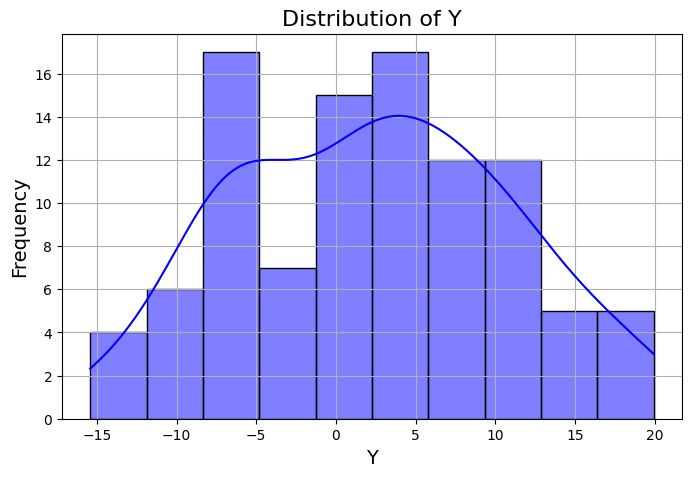

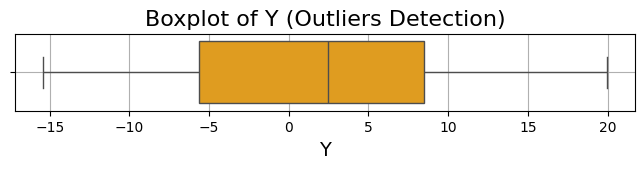

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics of Y
print("Descriptive statistics of Y:")
print(Y.describe())
print()

# Check for missing values
print("Missing values in Y:")
print(Y.isnull().sum())
print()

# Plot the distribution of Y
plt.figure(figsize=(8, 5))
sns.histplot(Y, kde=True, bins=10, color='blue')
plt.title("Distribution of Y", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(8, 1))
sns.boxplot(x=Y, color='orange')
plt.title("Boxplot of Y (Outliers Detection)", fontsize=16)
plt.xlabel("Y", fontsize=14)
plt.grid(True)
plt.show()


In [7]:
# Interpretation:
# We can see that y doesn't have any outlier. Its distribution seems to be bigaussien with means of -5 and 3.
# Nothing special to notice about the targert variable.

Predictors statistics and visualisation

Target dimensions: (100,)
Predictors dimensions: (100, 200)
Missing values in X:
0



Essential statistics for each feature:
      count      mean       std     min       25%      50%       75%     max
X1    100.0 -0.035051  1.359068 -3.4291 -0.867575  0.15115  1.053475  2.3887
X2    100.0 -0.078354  0.984814 -2.2972 -0.774175  0.01460  0.539800  2.4131
X3    100.0  0.150572  1.069848 -2.8344 -0.510475  0.17915  0.806425  2.4918
X4    100.0 -0.015394  1.282862 -2.6529 -0.900700  0.04170  0.955075  3.0085
X5    100.0 -0.051926  0.936731 -2.5628 -0.619250 -0.10645  0.547525  2.5337
X6    100.0 -0.039884  0.821642 -2.0634 -0.530450 -0.08175  0.609425  1.9893
X7    100.0  0.059076  0.920917 -1.9322 -0.755475  0.06870  0.673400  2.3240
X8    100.0  0.114772  0.980563 -2.1004 -0.557450  0.13475  0.836800  2.6025
X9    100.0  0.190370  1.187863 -2.3275 -0.716625  0.14930  0.971675  2.8503
X10   100.0  0.190691  1.103915 -2.9258 -0.598525  0.04675  0.860350  2.9476
X11   100.0  0.022007  0.757504 -2.1805 -0.542450  0.12260  0.561550  1.4983
X12   100.0 -0.003100  0.790760 -1.79

C:\Users\polol\AppData\Local\Temp\ipykernel_2540\2034472412.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outliers_X.index, y=outliers_X.values, palette="viridis")


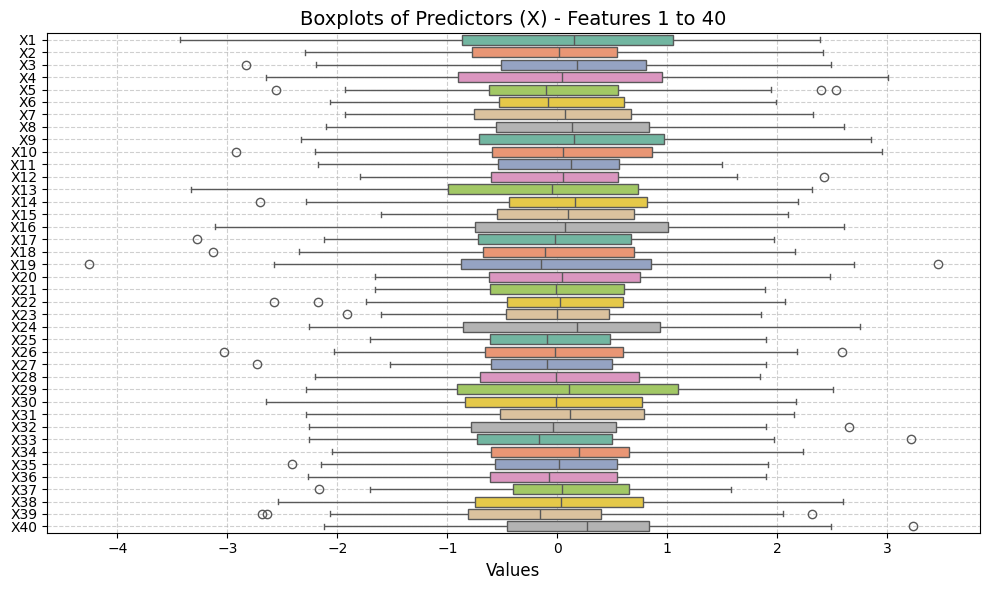

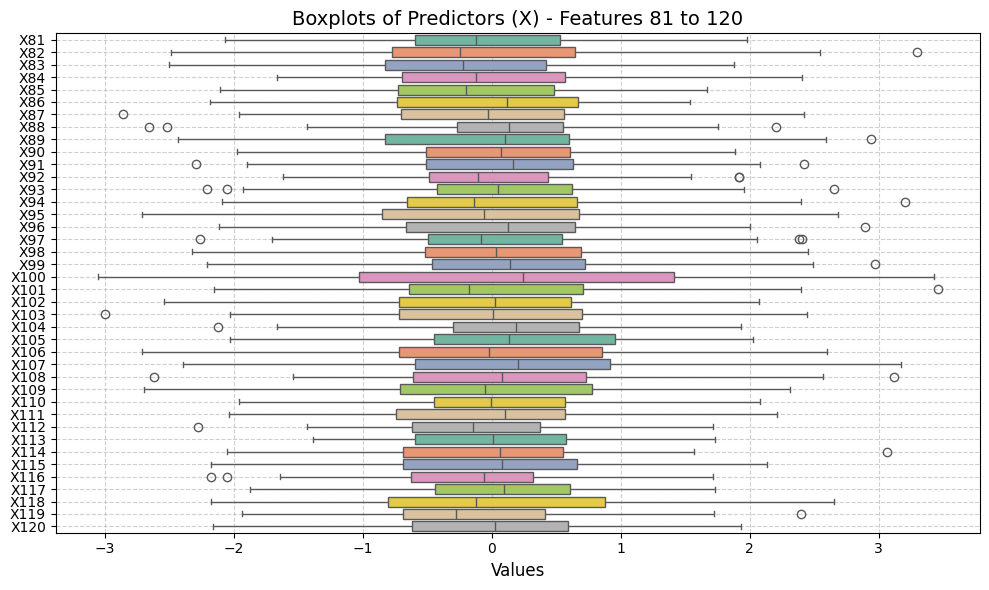

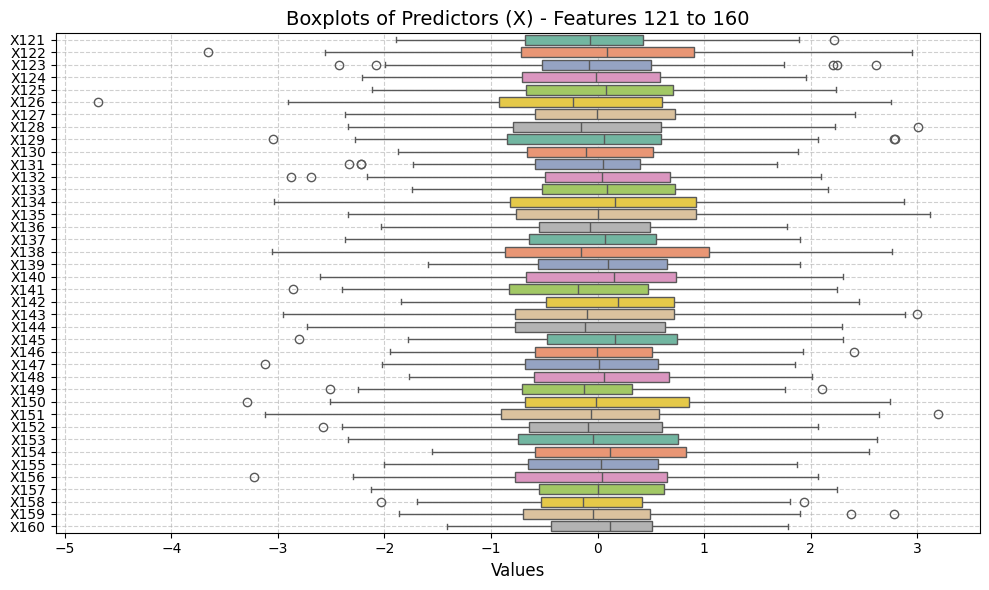

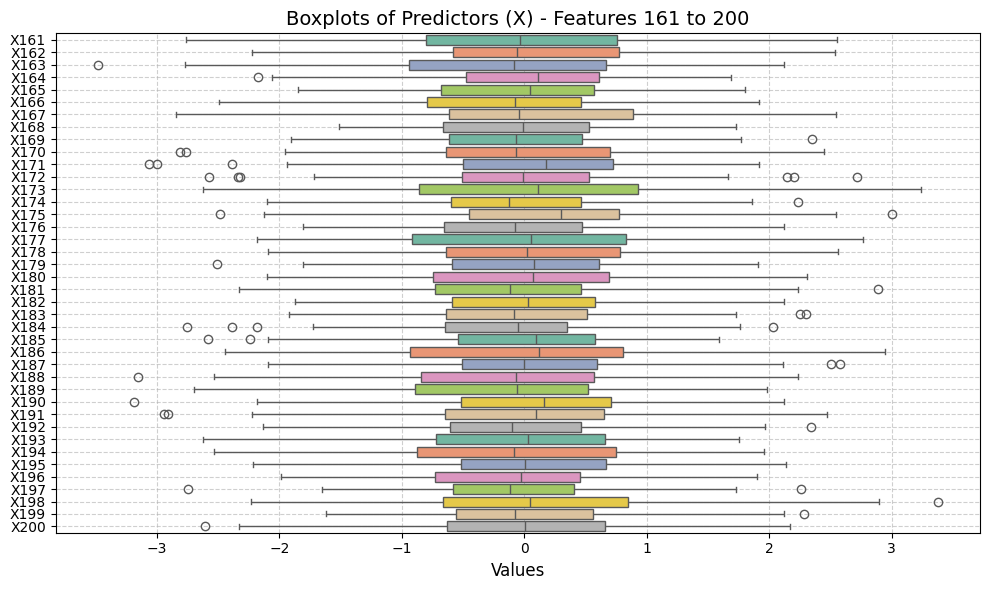

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Adjust pandas display settings to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Avoid line wrapping


### Display the basic information about the dataset to have a global vision of its content
print("Target dimensions:", Y.shape)
print("Predictors dimensions:", X.shape)


### Check for missing values
print("Missing values in X:")
print(X.isnull().sum().sum())
print()


### Display essential statistics
statistics = X.describe().T  # Transpose to display features as rows
print("Essential statistics for each feature:")
print(statistics, "\n")


### Outlier detection using the IQR method

# Detect outliers and count points with at least one outlier
def detect_outliers_summary(data, threshold=1.5):
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bounds, upper_bounds = Q1 - threshold * IQR, Q3 + threshold * IQR
    outlier_mask = (data < lower_bounds) | (data > upper_bounds)
    outliers_per_variable = outlier_mask.sum()
    points_with_outliers = outlier_mask.any(axis=1).sum()
    return outliers_per_variable[outliers_per_variable > 0], points_with_outliers

threshold = 1.7
outliers_X, total_points_with_outliers = detect_outliers_summary(X, threshold)
print(f"Total number of points with at least one outlier: {total_points_with_outliers}/{X.shape[0]}")

# Plot the number of outliers per variable
if not outliers_X.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=outliers_X.index, y=outliers_X.values, palette="viridis")
    plt.title(f"Number of Outliers by Variable (IQR scaling factor = {threshold})", fontsize=14)
    plt.xlabel("Variable", fontsize=12)
    plt.ylabel("Number of Outliers", fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No outliers detected in any variable.")



### Plot features boxplots
# Group the predictors into smaller chunks for better visualization
chunk_size = 40  # Number of predictors per plot
n_chunks = int(np.ceil(X.shape[1] / chunk_size))  # Total number of chunks

for i in range(n_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, X.shape[1])
    
    # Subset of features for the current chunk
    subset = X.iloc[:, start:end]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=subset, orient='h', palette="Set2", showfliers=True)
    plt.title(f"Boxplots of Predictors (X) - Features {start + 1} to {end}", fontsize=14)
    plt.xlabel("Values", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    
    # Adjust the y-axis for better readability
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()




Interpretation of X boxplots and outlier statistics

We observe that there are many outliers in this dataset (More than half of the samples has a least one outlier among its coordinates). 
Given the small size of our dataset (only 100 samples), it may not be appropriate to remove them at this stage, as it could result in a significant loss of valuable data.


In [9]:
### Plot each variable against the target variable (y)
# List of explanatory variables
features = X.columns

# Define the number of columns and rows for the subplots
n_features = len(X)
n_cols = 3  # Number of columns per figure
n_rows = int(np.ceil(len(features) / n_cols))

# Figure size (adjust as needed)
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=X[feature], y=Y, alpha=0.5)
    plt.title(f'{feature} vs y')
    plt.xlabel(feature)
    plt.ylabel('y')
    plt.grid(True)

plt.tight_layout()
plt.show()

RMSE scores for each fold: [2.913748626078398, 2.8671050349883322, 2.529606006107391, 2.7140655744374875, 2.4046767933363364]
Average RMSE: 2.685840406989589


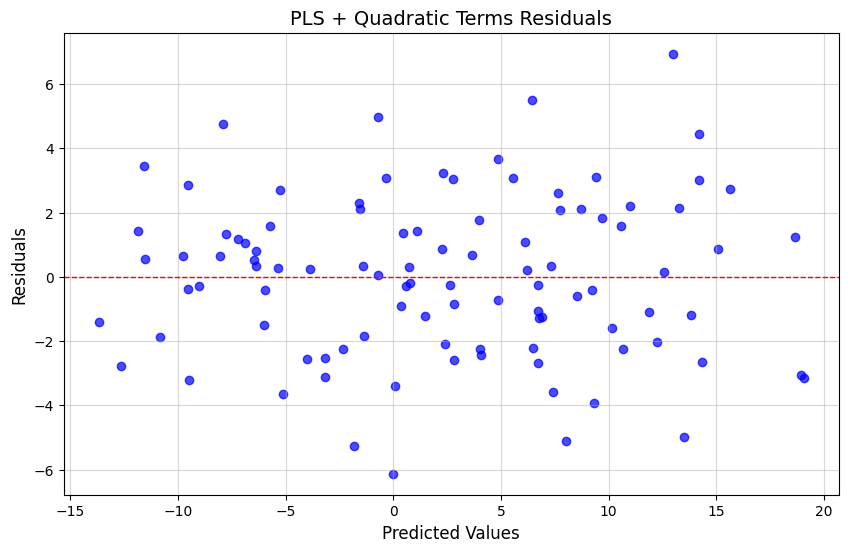

In [10]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Define number of components for PLS
n_components = 1

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform stratified cross-validation
n_bins = 5
n_splits = 5
random_state = 42
rmse_scores = []

# Bin the target variable for stratification
y_binned = pd.qcut(Y, q=n_bins, labels=False)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for train_index, test_index in skf.split(X, y_binned):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize and fit the PLS model on the training data
    pls_model = PLSRegression(n_components=n_components)
    pls_model.fit(X_train, Y_train)
    latent_train = pls_model.transform(X_train)  # Get latent components for training
    latent_test = pls_model.transform(X_test)    # Transform test data using the fitted model

    # Add quadratic and cubic terms to latent components
    latent_train_quadratic = np.hstack([latent_train, latent_train**2, latent_train**3 ])
    latent_test_quadratic = np.hstack([latent_test, latent_test**2, latent_test**3, ])

    # Train the linear regression model on the transformed training data
    linear_model.fit(latent_train_quadratic, Y_train)

    # Predict on the testing set
    predictions = linear_model.predict(latent_test_quadratic)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    rmse_scores.append(rmse)

# Calculate average RMSE across all folds
avg_rmse = np.mean(rmse_scores)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")

# Refit the PLS model on the entire dataset for residual analysis
pls_model.fit(X, Y)
latent_components = pls_model.transform(X)
latent_components_quadratic = np.hstack([latent_components, latent_components**2, latent_components**3])

# Train the linear model on the full dataset
linear_model.fit(latent_components_quadratic, Y)

# Plot residuals
def plot_residuals(model, X, Y, title="Residuals Plot"):
    predictions = model.predict(X)
    residuals = Y - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

plot_residuals(linear_model, latent_components_quadratic, Y, title="PLS + Quadratic Terms Residuals")




RMSE scores for each fold: [2.913748626078398, 2.8671050349883322, 2.529606006107391, 2.7140655744374875, 2.4046767933363364]
Average RMSE: 2.685840406989589


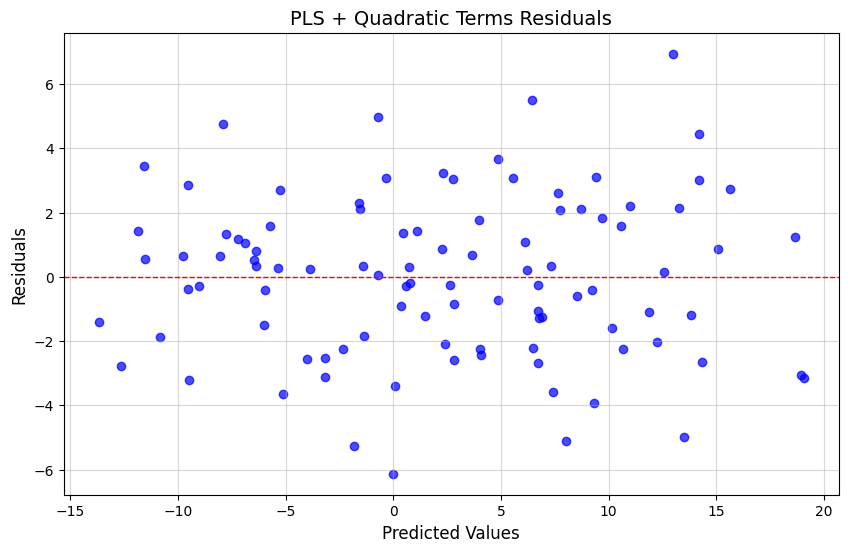

In [11]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Define number of components for PLS
n_components = 1

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform stratified cross-validation
n_bins = 5
n_splits = 5
random_state = 42
rmse_scores = []

# Bin the target variable for stratification
y_binned = pd.qcut(Y, q=n_bins, labels=False)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for train_index, test_index in skf.split(X, y_binned):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize and fit the PLS model on the training data
    pls_model = PLSRegression(n_components=n_components)
    pls_model.fit(X_train, Y_train)
    latent_train = pls_model.transform(X_train)  # Get latent components for training
    latent_test = pls_model.transform(X_test)    # Transform test data using the fitted model

    # Add quadratic and cubic terms to latent components
    latent_train_quadratic = np.hstack([latent_train, latent_train**2, latent_train**3 ])
    latent_test_quadratic = np.hstack([latent_test, latent_test**2, latent_test**3, ])

    # Train the linear regression model on the transformed training data
    linear_model.fit(latent_train_quadratic, Y_train)

    # Predict on the testing set
    predictions = linear_model.predict(latent_test_quadratic)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    rmse_scores.append(rmse)

# Calculate average RMSE across all folds
avg_rmse = np.mean(rmse_scores)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")

# Refit the PLS model on the entire dataset for residual analysis
pls_model.fit(X, Y)
latent_components = pls_model.transform(X)
latent_components_quadratic = np.hstack([latent_components, latent_components**2, latent_components**3])

# Train the linear model on the full dataset
linear_model.fit(latent_components_quadratic, Y)

# Plot residuals
def plot_residuals(model, X, Y, title="Residuals Plot"):
    predictions = model.predict(X)
    residuals = Y - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

plot_residuals(linear_model, latent_components_quadratic, Y, title="PLS + Quadratic Terms Residuals")




We have twice as many features as samples, which could lead to significant challenges related to collinearity and overfitting. Reducing the dimensionality of the dataset is therefore essential. As a first step, we will analyze the correlations between the features and \(y\) to identify and remove obviously irrelevant features.

## Predictors correlation with target feature

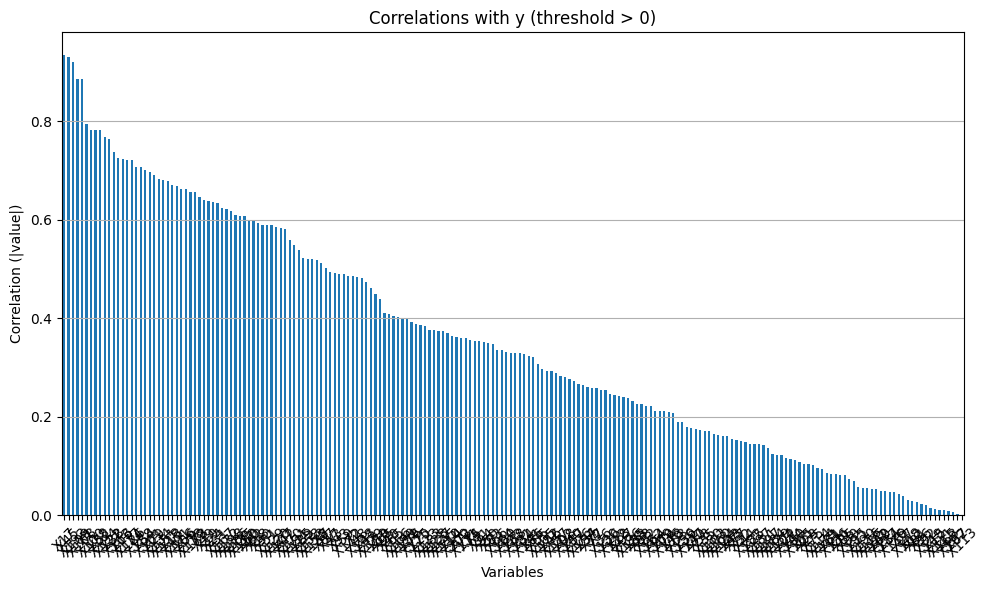

In [12]:
# Define a threshold for correlation to plot
corr_threshold = 0

correlations = X.corr()  # Exclude the correlation of y with itself

correlations = data.corr()['y'].drop('y').abs().sort_values(ascending=False)

# Filter correlations greater than corr_threshold
correlations = correlations[correlations > corr_threshold]

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', title=f"Correlations with y (threshold > {corr_threshold})")
plt.ylabel("Correlation (|value|)")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Interpretation

The variables exhibit a broad spectrum of correlation values with the target variable y, ranging from high (around 0.8) to low (approaching 0). However, the distribution of correlations appears relatively uniform across this range. This makes it difficult to identify a clear threshold or "breakpoint" to effectively reduce the dimensionality of the dataset.

We now perform a Partial Least Squares (PLS) regression to identify latent components 
that better capture the relationships between the predictors and the target variable y. 
This approach will help us isolate and eliminate less relevant features in a more systematic manner.

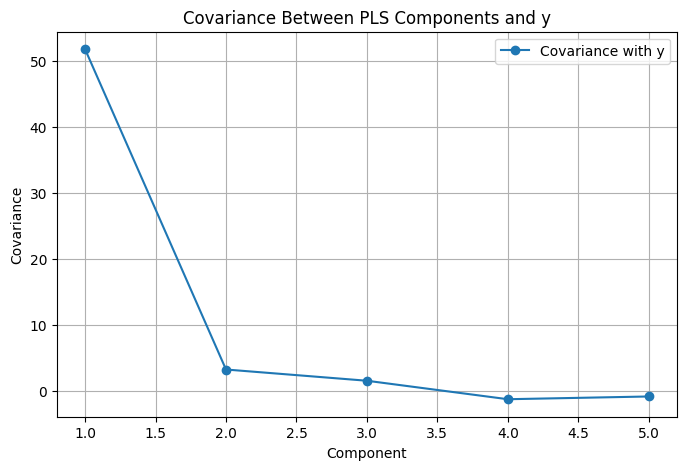

In [13]:
from sklearn.cross_decomposition import PLSRegression
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit the PLS model
n_components = 5  # Maximum number of components to test
pls_model = PLSRegression(n_components=n_components)
pls_model.fit(X, Y)

# Calculate covariances between each latent component and Y
latent_components = pls_model.x_scores_
covariances = [np.cov(latent_components[:, i], Y)[0, 1] for i in range(latent_components.shape[1])]

# Plot the covariances
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), covariances, marker='o', label="Covariance with y")
plt.title("Covariance Between PLS Components and y")
plt.xlabel("Component")
plt.ylabel("Covariance")
plt.grid()
plt.legend()
plt.show()


We observe that the first component is exrtremly more correlated with y. We will select only this one to reduce the dataset dimensions. 

We compute PLS Regression RMSE

In [14]:
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

# Define the number of components for PLS
n_components = 1  # Specify the number of components

# Initialize the PLS model
pls_model = PLSRegression(n_components=n_components)

# Perform stratified cross-validation
rmse_scores, avg_rmse = stratified_cross_val_rmse(pls_model, X, Y, n_bins=5, n_splits=5)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")

# Refit the model on the entire dataset to get latent components
pls_model.fit(X, Y)
latent_components = pls_model.x_scores_

# Plot y against each latent component
plt.figure(figsize=(15, 5))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.scatter(latent_components[:, i], Y, alpha=0.7, color='blue')
    plt.title(f"y vs Component {i + 1}", fontsize=12)
    plt.xlabel(f"Component {i + 1}", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

# Refit the PLS model on the entire dataset
pls_model.fit(X, Y)

# Plot residuals
plot_residuals(pls_model, X, Y, title="Residuals Plot (PLS Regression)")


RMSE scores for each fold: [3.1850713408019056, 2.7945596363130667, 2.8180741183704248, 2.7005777703813094, 2.375244917892743]
Average RMSE: 2.7747055567518903


We achieved a significant improvement in the RMSE score. However we observe a quadratic tendency in the residuals serie. To solve that we will add new quadratic predictors 


RMSE scores for each fold: [2.913748626078398, 2.8671050349883322, 2.529606006107391, 2.7140655744374875, 2.4046767933363364]
Average RMSE: 2.685840406989589


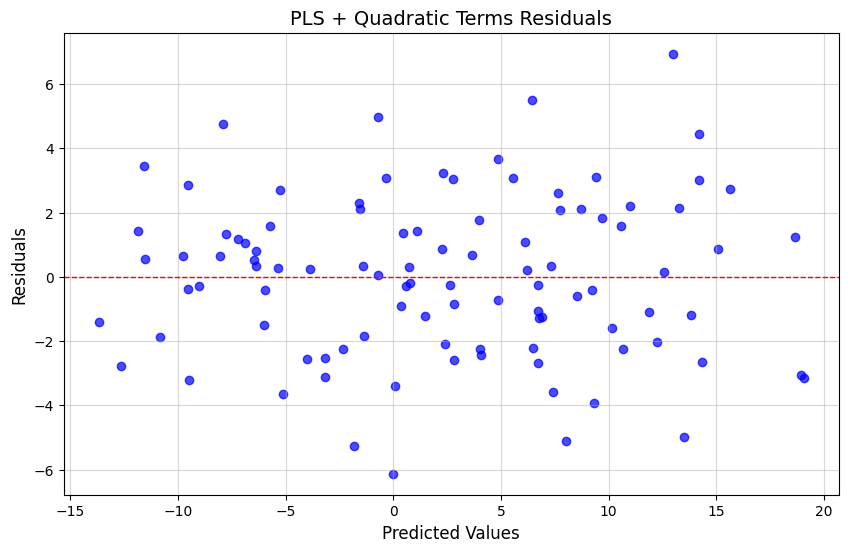

In [15]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Define number of components for PLS
n_components = 1

# Initialize the linear regression model
linear_model = LinearRegression()

# Perform stratified cross-validation
n_bins = 5
n_splits = 5
random_state = 42
rmse_scores = []

# Bin the target variable for stratification
y_binned = pd.qcut(Y, q=n_bins, labels=False)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

for train_index, test_index in skf.split(X, y_binned):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Initialize and fit the PLS model on the training data
    pls_model = PLSRegression(n_components=n_components)
    pls_model.fit(X_train, Y_train)
    latent_train = pls_model.transform(X_train)  # Get latent components for training
    latent_test = pls_model.transform(X_test)    # Transform test data using the fitted model

    # Add quadratic and cubic terms to latent components
    latent_train_quadratic = np.hstack([latent_train, latent_train**2, latent_train**3 ])
    latent_test_quadratic = np.hstack([latent_test, latent_test**2, latent_test**3, ])

    # Train the linear regression model on the transformed training data
    linear_model.fit(latent_train_quadratic, Y_train)

    # Predict on the testing set
    predictions = linear_model.predict(latent_test_quadratic)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    rmse_scores.append(rmse)

# Calculate average RMSE across all folds
avg_rmse = np.mean(rmse_scores)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")

# Refit the PLS model on the entire dataset for residual analysis
pls_model.fit(X, Y)
latent_components = pls_model.transform(X)
latent_components_quadratic = np.hstack([latent_components, latent_components**2, latent_components**3])

# Train the linear model on the full dataset
linear_model.fit(latent_components_quadratic, Y)

# Plot residuals
def plot_residuals(model, X, Y, title="Residuals Plot"):
    predictions = model.predict(X)
    residuals = Y - predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, residuals, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted Values", fontsize=12)
    plt.ylabel("Residuals", fontsize=12)
    plt.grid(alpha=0.5)
    plt.show()

plot_residuals(linear_model, latent_components_quadratic, Y, title="PLS + Quadratic Terms Residuals")




Next, we will apply feature selection using Elastic Net regression to see if the model's performance can be further enhanced with another method of features selection. Before that we must normalize and center our dataset

Normalization

In [16]:
# Normalize the dataset
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)  # Returns a NumPy array

# Convert the NumPy array back to a DataFrame while preserving column names
predictors_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

Add quadratic terms to the dataset based on the residual patterns observed in the previous model

In [17]:
X_with_squares = pd.concat([X, X**2], axis=1)

Now we try an Elastic Net Regression

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # Import nécessaire pour la heatmap

# Define a range of regularization parameters and l1_ratios
alphas = np.linspace(0.03, 1, 10)  # Regularization strength
l1_ratios = np.linspace(0.1, 1.0, 10)  # L1 ratio (from Ridge to Lasso)

# Create a parameter grid for alpha and l1_ratio
param_grid = ParameterGrid({'alpha': alphas, 'l1_ratio': l1_ratios})

# Store results
results = []

# Test each combination of alpha and l1_ratio
c = 0
total_params = len(param_grid)  # Nombre total de combinaisons dans la grille

for params in param_grid:
    alpha = params['alpha']
    l1_ratio = params['l1_ratio']
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    _, avg_rmse = stratified_cross_val_rmse(elastic_net_model, X_with_squares, Y, n_bins=5, n_splits=5)
    results.append((alpha, l1_ratio, avg_rmse))
    
    # Afficher la progression
    c += 1
    print(f"Progress: {c / total_params:.2%}")  # Format en pourcentage
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Alpha', 'L1_Ratio', 'RMSE'])

# Find the best parameters
best_row = results_df.loc[results_df['RMSE'].idxmin()]
best_alpha = best_row['Alpha']
best_l1_ratio = best_row['L1_Ratio']
best_rmse = best_row['RMSE']

print(f"Best Alpha: {best_alpha:.3f}")
print(f"Best L1_Ratio: {best_l1_ratio:.3f}")
print(f"Minimum RMSE: {best_rmse:.4f}")

# Pivot the DataFrame for heatmap plotting
heatmap_data = results_df.pivot_table(index='L1_Ratio', columns='Alpha', values='RMSE')

# Plot heatmap of RMSE values
plt.figure(figsize=(12, 8))
plt.title("RMSE Heatmap for Elastic Net (Alpha vs L1_Ratio)", fontsize=16)
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'RMSE'})
plt.xlabel("Alpha (Regularization Parameter)", fontsize=12)
plt.ylabel("L1_Ratio", fontsize=12)
plt.tight_layout()
plt.show()




C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.985e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.027e+00, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 1.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.389e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.565e+00, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 2.00%
Progress: 3.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.835e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.051e+00, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 4.00%
Progress: 5.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.865e+00, tolerance: 5.870e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.217e+00, tolerance: 5.736e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 6.00%
Progress: 7.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.870e-01, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 8.00%
Progress: 9.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.938e-01, tolerance: 5.870e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+00, tolerance: 5.736e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 10.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.966e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+00, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\loca

Progress: 11.00%
Progress: 12.00%


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+00, tolerance: 5.725e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.619e-01, tolerance: 5.980e-01
  model = cd_fast.enet_coordinate_descent(


Progress: 13.00%
Progress: 14.00%
Progress: 15.00%
Progress: 16.00%
Progress: 17.00%
Progress: 18.00%
Progress: 19.00%
Progress: 20.00%
Progress: 21.00%
Progress: 22.00%
Progress: 23.00%
Progress: 24.00%
Progress: 25.00%
Progress: 26.00%
Progress: 27.00%
Progress: 28.00%
Progress: 29.00%
Progress: 30.00%
Progress: 31.00%
Progress: 32.00%
Progress: 33.00%
Progress: 34.00%
Progress: 35.00%
Progress: 36.00%
Progress: 37.00%
Progress: 38.00%
Progress: 39.00%
Progress: 40.00%
Progress: 41.00%
Progress: 42.00%
Progress: 43.00%
Progress: 44.00%
Progress: 45.00%
Progress: 46.00%
Progress: 47.00%
Progress: 48.00%
Progress: 49.00%
Progress: 50.00%
Progress: 51.00%
Progress: 52.00%
Progress: 53.00%
Progress: 54.00%
Progress: 55.00%
Progress: 56.00%
Progress: 57.00%
Progress: 58.00%
Progress: 59.00%
Progress: 60.00%
Progress: 61.00%
Progress: 62.00%
Progress: 63.00%
Progress: 64.00%
Progress: 65.00%
Progress: 66.00%
Progress: 67.00%
Progress: 68.00%
Progress: 69.00%
Progress: 70.00%
Progress: 71.0

RMSE scores for each fold: [3.3188838153959996, 2.9052132720206183, 2.465263954975231, 2.9874048056633438, 2.2887641552563]
Average RMSE: 2.7931060006622985


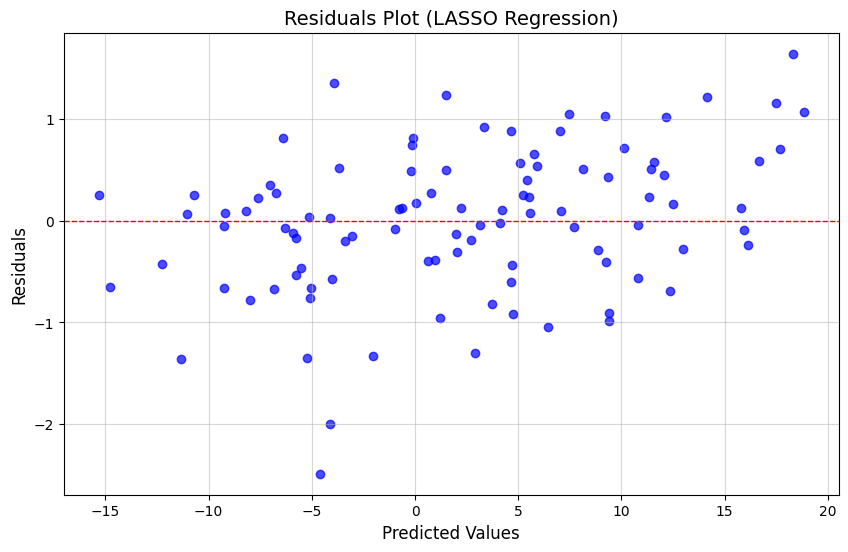

In [19]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Initialize Elastic Net model
alpha = 0.246  # Regularization strength
l1_ratio = 0.4  # Mix between Lasso (L1) and Ridge (L2)
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)

# Perform stratified cross-validation
rmse_scores, avg_rmse = stratified_cross_val_rmse(elastic_net_model, X_with_squares, Y, n_bins=5, n_splits=5)

# Display results
print(f"RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE: {avg_rmse}")


# Plot residuals
elastic_net_model.fit(X_with_squares, Y)
plot_residuals(elastic_net_model, X_with_squares, Y, title="Residuals Plot (LASSO Regression)")

## We try a neural Network

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Update build_model function with regularization and adjustable learning rate
def build_model(hidden_layers=1, units=32, activation='relu', optimizer='adam', dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units, input_dim=X.shape[1], activation=activation, kernel_regularizer=l2(0.001)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers):
        model.add(Dense(units, activation=activation, kernel_regularizer=l2(0.001)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    # Choose optimizer
    if optimizer == 'adam':
        optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer_instance = RMSprop(learning_rate=learning_rate)
    else:
        optimizer_instance = optimizer  # Default optimizer
    model.compile(optimizer=optimizer_instance, loss='mean_squared_error', metrics=['mse'])
    return model

# Wrap the model for GridSearchCV with verbose output
model = KerasRegressor(
    model=build_model,
    verbose=1  # Display training progress for each epoch
)

# Reduce param_grid to fewer options
param_grid = {
    'model__hidden_layers': [1, 2],          # Reduced from [1, 2, 3]
    'model__units': [32, 64],                # Reduced from [32, 64, 128]
    'model__activation': ['relu', 'tanh', 'elu'],           # Using only 'relu'
    'model__dropout_rate': [0.0, 0.2],       # Reduced options
    'optimizer': ['adam'],                   # Using only 'adam'
    'model__learning_rate': [0.001],         # Using only one learning rate
    'batch_size': [32],                      # Using only one batch size
    'epochs': [50]                           # Reduced number of epochs
}

# Define custom RMSE scorer
def rmse_scorer(y_true, y_pred):
    return -np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Use K-Fold Cross-Validation with fewer splits
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced from 5 to 3 folds

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Perform GridSearchCV with verbose output
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kf,
    scoring=scorer,
    n_jobs=-1,
    refit=True,
    return_train_score=True,
    verbose=2  # Display grid search progress
)

# Fit the model with early stopping
grid_result = grid.fit(X_scaled, Y, callbacks=[early_stopping], validation_split=0.1)

# Display the best parameters and RMSE
print(f"Best RMSE: {-grid_result.best_score_:.4f}")
print(f"Best Parameters: {grid_result.best_params_}")



Fitting 3 folds for each of 24 candidates, totalling 72 fits
Epoch 1/50


C:\Users\polol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 88.8183 - mse: 88.7001 - val_loss: 51.3645 - val_mse: 51.2464
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 80.8791 - mse: 80.7609 - val_loss: 44.8540 - val_mse: 44.7357
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.0854 - mse: 69.9671 - val_loss: 39.0430 - val_mse: 38.9247
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 65.4861 - mse: 65.3678 - val_loss: 33.9895 - val_mse: 33.8710
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 54.7182 - mse: 54.5997 - val_loss: 29.6957 - val_mse: 29.5771
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 54.5280 - mse: 54.4094 - val_loss: 25.8462 - val_mse: 25.7275
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 50.2354 - mse: 50.1166 - val_loss: 22.3830 - val_mse: 22.2641
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 46.1756 - mse: 46.0566 - val_loss: 19.3121 - val_mse: 19.1930
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 41

###Maxi loop, gridsearchCV for the best regression